# ALU implementation inside PS using PS GPIO with PYNQ

### System block diagram:

Hardware design is shown below. ALU is implemented in VHDL, packaged as an IP and added into the system. The PS of the FPGA implements the ALU logic inside the FPGA on PYNQ-Z2 board.

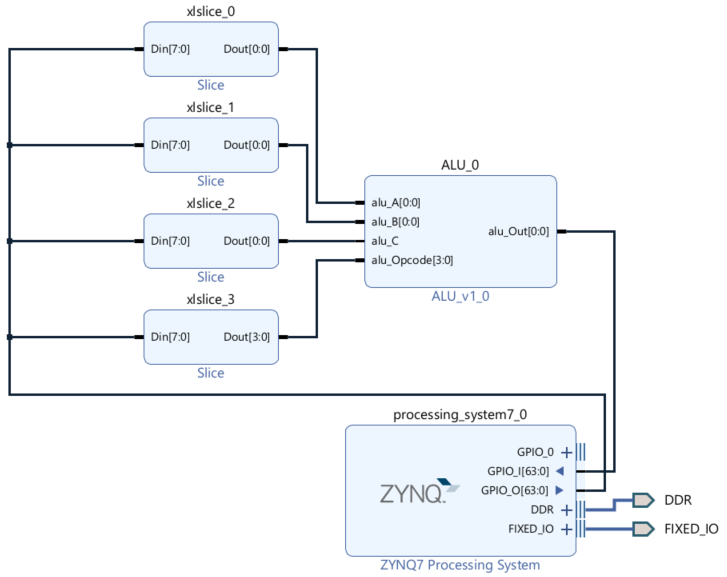

## Loading the Overlay:

An overlay (bitstream) is created for the above system using Vivado. This overlay includes:

<li> Bitstream (ALU_Zynq_PS.bit) file to configure the FPGA fabric </li>
<li> Vivado design hardware handoff (ALU_Zynq_PS.hwh) file </li>

</br>
The bitstream and hardware handoff files must be downloaded into Jupyter notebook for installing to the board.
The <code>overlay</code> class in PYNQ is then used to load the overlay. It is then instantiated by specifying the relative path to the bitstream file. 
</br>

In [1]:
from pynq import Overlay
ol = Overlay("./ALU_Zynq_PS.bit")

## GPIO class

The GPIO calss will be used to access the PS GPIO. The Zynq device has up to 64 GPIO from PS to PL. The PS GPIO are simple wires from the PS and no IP is required in the PL to use these GPIOs.

In [60]:
from pynq import GPIO
from time import sleep

alu_Out = GPIO(GPIO.get_gpio_pin(0), 'in')

alu_A = GPIO(GPIO.get_gpio_pin(1), 'out')
alu_B = GPIO(GPIO.get_gpio_pin(2), 'out')
alu_C = GPIO(GPIO.get_gpio_pin(3), 'out')

alu_OpCode0 = GPIO(GPIO.get_gpio_pin(4), 'out')
alu_OpCode1 = GPIO(GPIO.get_gpio_pin(5), 'out')
alu_OpCode2 = GPIO(GPIO.get_gpio_pin(6), 'out')
alu_OpCode3 = GPIO(GPIO.get_gpio_pin(7), 'out')

## Testing the Logic unit of ALU

### NOT:

In [61]:
alu_A.write(0)

# Opcode for NOT (A input): 0000
alu_OpCode3.write(0)
alu_OpCode2.write(0)
alu_OpCode1.write(0)
alu_OpCode0.write(0)

print("NOT alu_A: ", alu_Out.read())

NOT alu_A:  1


In [59]:
alu_B.write(1)

# Opcode for NOT (B input): 0001
alu_OpCode3.write(0)
alu_OpCode2.write(0)
alu_OpCode1.write(0)
alu_OpCode0.write(1)

print("NOT alu_B: ", alu_Out.read())

NOT alu_B:  0


### AND:

In [75]:
# Opcode for AND operation: 0010
alu_OpCode3.write(0)
alu_OpCode2.write(0)
alu_OpCode1.write(1)
alu_OpCode0.write(0)

print("-----------AND-------------")
print("| alu_A | alu_B | alu_Out |")
print("|-------------------------|")
for x in range(2):
    for y in range(2):
        alu_A.write(x)
        alu_B.write(y)
        AND = alu_Out.read()
        print(f"|   {x}   |    {y}  |    {AND}    |")

-----------AND-------------
| alu_A | alu_B | alu_Out |
|-------------------------|
|   0   |    0  |    0    |
|   0   |    1  |    0    |
|   1   |    0  |    0    |
|   1   |    1  |    1    |


### OR:

In [76]:
# Opcode for OR operation: 0011
alu_OpCode3.write(0)
alu_OpCode2.write(0)
alu_OpCode1.write(1)
alu_OpCode0.write(1)

print("------------OR-------------")
print("| alu_A | alu_B | alu_Out |")
print("|-------------------------|")
for x in range(2):
    for y in range(2):
        alu_A.write(x)
        alu_B.write(y)
        OR = alu_Out.read()
        print(f"|   {x}   |    {y}  |    {OR}    |")

------------OR-------------
| alu_A | alu_B | alu_Out |
|-------------------------|
|   0   |    0  |    0    |
|   0   |    1  |    1    |
|   1   |    0  |    1    |
|   1   |    1  |    1    |


### NAND:

In [77]:
# Opcode for NAND operation: 0100
alu_OpCode3.write(0)
alu_OpCode2.write(1)
alu_OpCode1.write(0)
alu_OpCode0.write(0)

print("-----------NAND------------")
print("| alu_A | alu_B | alu_Out |")
print("|-------------------------|")
for x in range(2):
    for y in range(2):
        alu_A.write(x)
        alu_B.write(y)
        NAND = alu_Out.read()
        print(f"|   {x}   |    {y}  |    {NAND}    |")

-----------NAND------------
| alu_A | alu_B | alu_Out |
|-------------------------|
|   0   |    0  |    1    |
|   0   |    1  |    1    |
|   1   |    0  |    1    |
|   1   |    1  |    0    |


### NOR:

In [78]:
# Opcode for NOR operation: 0101
alu_OpCode3.write(0)
alu_OpCode2.write(1)
alu_OpCode1.write(0)
alu_OpCode0.write(1)

print("-----------NOR-------------")
print("| alu_A | alu_B | alu_Out |")
print("|-------------------------|")
for x in range(2):
    for y in range(2):
        alu_A.write(x)
        alu_B.write(y)
        NOR = alu_Out.read()
        print(f"|   {x}   |    {y}  |    {NOR}    |")

-----------NOR-------------
| alu_A | alu_B | alu_Out |
|-------------------------|
|   0   |    0  |    1    |
|   0   |    1  |    0    |
|   1   |    0  |    0    |
|   1   |    1  |    0    |


### XOR:

In [79]:
# Opcode for XOR operation: 0110
alu_OpCode3.write(0)
alu_OpCode2.write(1)
alu_OpCode1.write(1)
alu_OpCode0.write(0)

print("-----------XOR-------------")
print("| alu_A | alu_B | alu_Out |")
print("|-------------------------|")
for x in range(2):
    for y in range(2):
        alu_A.write(x)
        alu_B.write(y)
        XOR = alu_Out.read()
        print(f"|   {x}   |    {y}  |    {XOR}    |")

-----------XOR-------------
| alu_A | alu_B | alu_Out |
|-------------------------|
|   0   |    0  |    0    |
|   0   |    1  |    1    |
|   1   |    0  |    1    |
|   1   |    1  |    0    |


### XNOR:

In [80]:
# Opcode for XNOR operation: 0111
alu_OpCode3.write(0)
alu_OpCode2.write(1)
alu_OpCode1.write(1)
alu_OpCode0.write(1)

print("-----------XNOR------------")
print("| alu_A | alu_B | alu_Out |")
print("|-------------------------|")
for x in range(2):
    for y in range(2):
        alu_A.write(x)
        alu_B.write(y)
        XNOR = alu_Out.read()
        print(f"|   {x}   |    {y}  |    {XNOR}    |")

-----------XNOR------------
| alu_A | alu_B | alu_Out |
|-------------------------|
|   0   |    0  |    1    |
|   0   |    1  |    0    |
|   1   |    0  |    0    |
|   1   |    1  |    1    |


## Testing the Arithment unit of ALU

In [84]:
# Opcode 1000, pass alu_A

alu_OpCode3.write(1)
alu_OpCode2.write(0)
alu_OpCode1.write(0)
alu_OpCode0.write(0)

alu_A.write(1)
print("alu_Out: ", alu_Out.read())

alu_Out:  1


In [85]:
# Opcode 1001, pass alu_B

alu_OpCode3.write(1)
alu_OpCode2.write(0)
alu_OpCode1.write(0)
alu_OpCode0.write(1)

alu_B.write(0)
print("alu_Out: ", alu_Out.read())

alu_Out:  0


In [86]:
# Opcode 1010: alu_A+1

alu_OpCode3.write(1)
alu_OpCode2.write(0)
alu_OpCode1.write(1)
alu_OpCode0.write(0)

alu_A.write(0)
print("alu_Out: ", alu_Out.read())

alu_Out:  1


In [87]:
# Opcode 1011: alu_B+1

alu_OpCode3.write(1)
alu_OpCode2.write(0)
alu_OpCode1.write(1)
alu_OpCode0.write(1)

alu_B.write(1)
print("alu_Out: ", alu_Out.read())

alu_Out:  0


In [88]:
# Opcode 1100: alu_A-1

alu_OpCode3.write(1)
alu_OpCode2.write(1)
alu_OpCode1.write(0)
alu_OpCode0.write(0)

alu_A.write(0)
print("alu_Out: ", alu_Out.read())

alu_Out:  1


In [89]:
# Opcode 1101: alu_B-1

alu_OpCode3.write(1)
alu_OpCode2.write(1)
alu_OpCode1.write(0)
alu_OpCode0.write(1)

alu_B.write(1)
print("alu_Out: ", alu_Out.read())

alu_Out:  0


In [91]:
# Opcode 1110: alu_A + alu_B

alu_OpCode3.write(1)
alu_OpCode2.write(1)
alu_OpCode1.write(1)
alu_OpCode0.write(0)

alu_B.write(0)
alu_B.write(1)

print("alu_Out: ", alu_Out.read())

alu_Out:  1


In [92]:
# Opcode 1111: alu_A + alu_B + alu_C

alu_OpCode3.write(1)
alu_OpCode2.write(1)
alu_OpCode1.write(1)
alu_OpCode0.write(1)

alu_B.write(1)
alu_B.write(1)
alu_C.write(1)

print("alu_Out: ", alu_Out.read())

alu_Out:  0
